In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("clustering_data.csv")
df.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [5]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop any rows with NaN values if they exist
df = df.dropna(subset=['Latitude', 'Longitude'])

In [6]:
filtered_df = df[df['CircleName'].str.contains('Uttar Pradesh', case=False)]
filtered_df.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
277,Uttar Pradesh Circle,Gorakhpur Region,Gorakhpur Division,NDC Gorakhpur,273001,PO,Non Delivery,GORAKHPUR,UTTAR PRADESH,26.760600,83.373200
1172,Uttar Pradesh Circle,Lucknow HQ Region,Ghaziabad Division,NDC Ghaziabad,201001,PO,Non Delivery,GHAZIABAD,UTTAR PRADESH,28.655600,77.427700
1281,Uttar Pradesh Circle,Agra Region,Agra Division,NDC Agra,282001,PO,Non Delivery,AGRA,UTTAR PRADESH,27.165185,78.011902
2480,Uttar Pradesh Circle,Allahabad Region,Allahabad Division,NTPC Kohdar Meja SO,212308,PO,Delivery,PRAYAGRAJ,UTTAR PRADESH,25.141700,81.984600
4387,Uttar Pradesh Circle,Lucknow HQ Region,Lucknow GPO Division,NDC LUCKNOW GPO,226001,PO,Non Delivery,LUCKNOW,UTTAR PRADESH,26.846695,80.946167


In [7]:
num_rows, num_cols = filtered_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1647
Number of columns: 11


In [8]:
print(filtered_df['Latitude'].dtype)
print(filtered_df['Longitude'].dtype)

float64
float64


In [9]:
import matplotlib.pyplot as plt

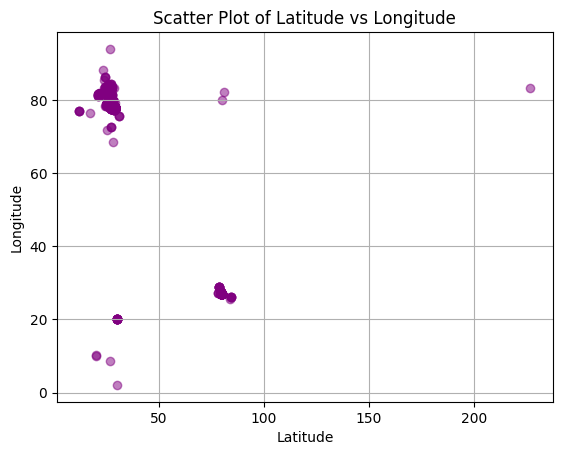

In [10]:
x_axis = filtered_df['Latitude']
y_axis = filtered_df['Longitude']
plt.scatter(x_axis,y_axis, marker='o', color='purple', alpha=0.5)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

In [11]:
def initialize_centroids(data, k):
    """ Initialize centroids by randomly selecting k data points as centroids. """
    np.random.seed(0)
    centroids_idx = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_idx]
    return centroids

In [12]:
def assign_to_clusters(data, centroids):
    """ Assign each data point to the closest centroid. """
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

In [13]:
def update_centroids(data, clusters, k):
    """ Update centroids based on the mean of data points assigned to each cluster. """
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

In [14]:
def kmeans(data, k, max_iterations=100):
    """ Perform k-means clustering on the given data with k clusters. """
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [15]:
# Extract latitude and longitude values
data = filtered_df[['Latitude', 'Longitude']].values

# Number of clusters
k = 2

# Perform k-means clustering
clusters, centroids = kmeans(data, k, max_iterations=300)
filtered_df['Cluster'] = clusters

<ipython-input-15-b7a867229ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = clusters


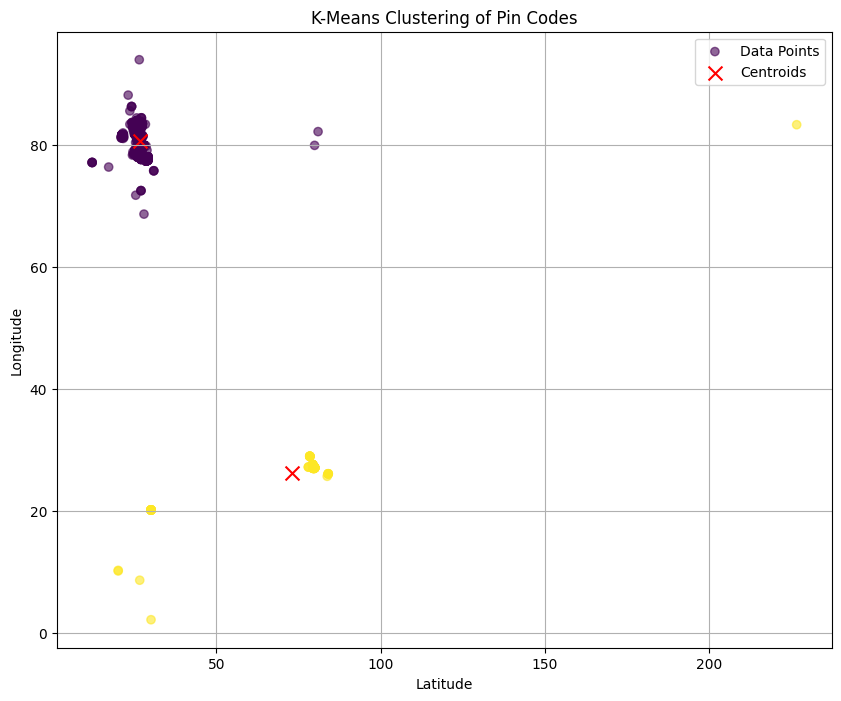

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df['Latitude'], filtered_df['Longitude'], c=filtered_df['Cluster'], cmap='viridis', marker='o', alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering of Pin Codes')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
for cluster_id in range(k):
    cluster_points = filtered_df[filtered_df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f"Number of Points: {len(cluster_points)}")
    print(f"Centroid: {centroids[cluster_id]}")

Cluster 0:
Number of Points: 1530
Centroid: [26.59542843 80.66075713]
Cluster 1:
Number of Points: 117
Centroid: [73.14601443 26.18788977]
